In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("BostonHousing.csv", header =0)
print (df.head)
print(df.describe())
print(df.isnull().sum())

<bound method NDFrame.head of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       1

In [3]:
#checking for inconsistencies in dataset
df.dtypes


crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

In [4]:
#checking the values of chas and rad
print(df['chas'].unique())
print(df['rad'].unique())

[0 1]
[ 1  2  3  5  4  8  6  7 24]


In [5]:
df.duplicated().sum()

np.int64(0)

<Axes: >

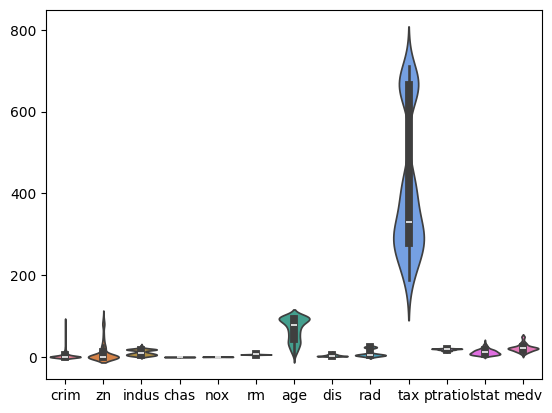

In [6]:
sns.violinplot(df)


In [7]:
#outliners detecton excluding chas  because it has just zeros and ones
# for feature in df.columns:
#   sns.boxplot(df[feature])
#   plt.title(f"box plot of {feature}")
#   plt.show()


In [8]:
#trying z score outliers for the dataset
z_scores = np.abs((df - df.mean()) / df.std())
threshold = 3
df_cleaned = df[(z_scores <= threshold).all(axis=1)]
print("original dataframe:\n", df)
print("\ncleaned dataframe(outliers removed):\n", df_cleaned)


original dataframe:
         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.0

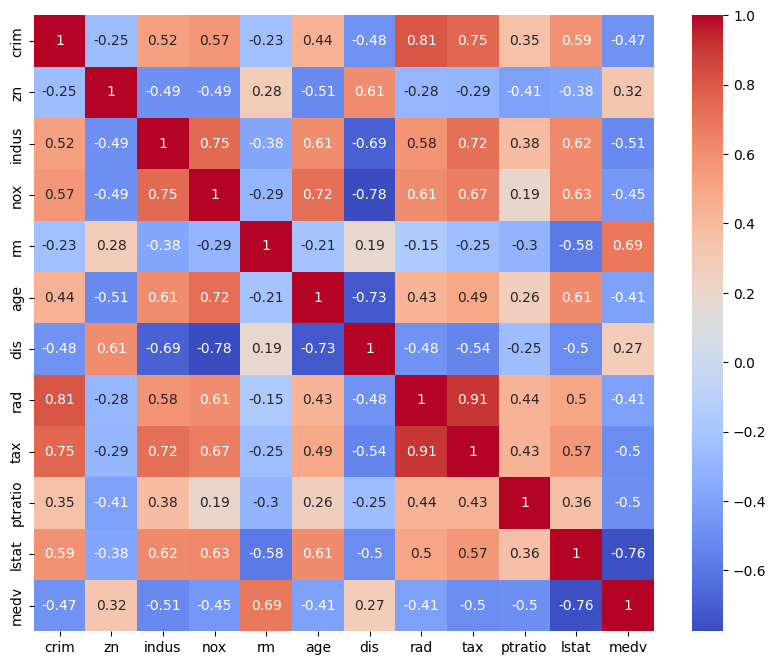

In [9]:
#correlation is checked between the variables using heatmap
df_cleaned1 = df_cleaned.drop('chas', axis=1)
corr_matrix = df_cleaned1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

C:\Users\Redi 71\AppData\Local\Temp\ipykernel_13268\2421452462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['medv_log']=np.log(df['medv']+1)
C:\Users\Redi 71\AppData\Local\Temp\ipykernel_13268\2421452462.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


MEAN SQUARED ERROR : 0.018276356553892478
R SQUARED VALUE: 0.8096857605614394
MEAN ABSOLUTE ERROR: 0.08782189559709683


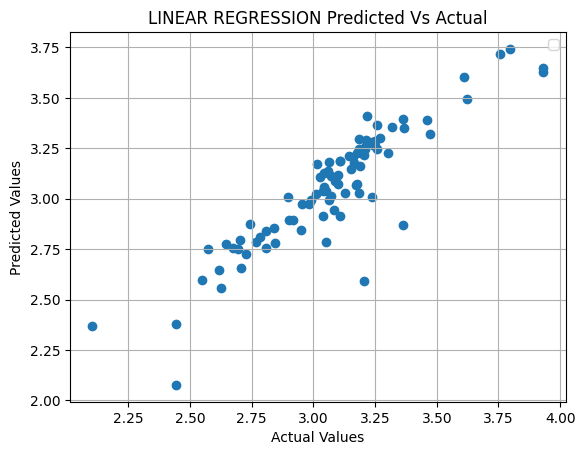

Feature: 0, Score: -0.09044
Feature: 1, Score: 0.00201
Feature: 2, Score: 0.01396
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.06413
Feature: 5, Score: 0.07122
Feature: 6, Score: 0.00346
Feature: 7, Score: -0.07167
Feature: 8, Score: 0.12398
Feature: 9, Score: -0.11348
Feature: 10, Score: -0.07948
Feature: 11, Score: -0.18281


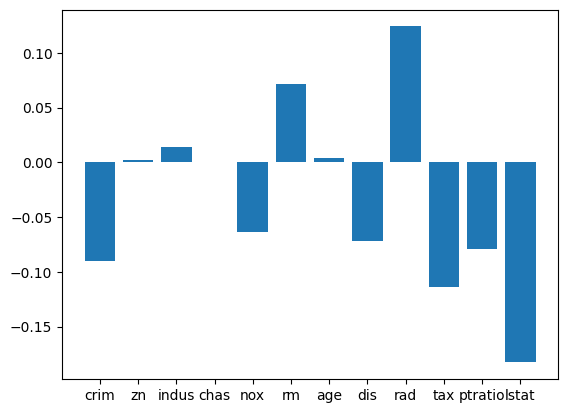

In [10]:
df_cleaned['medv_log']=np.log(df['medv']+1)
X=df_cleaned.drop(['medv_log', 'medv'],axis=1)
Y=df_cleaned['medv_log']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#standardisation

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#fitting an model
#LINEAR REGRESSION MODEL

model_LR=LinearRegression()
model_LR.fit(X_train_scaled,Y_train)
Y_predict=model_LR.predict(X_test_scaled)
mse_linearregression=mean_squared_error(Y_test,Y_predict)
r2_linearregression=r2_score(Y_test,Y_predict)
mae_linearregression=mean_absolute_error(Y_test,Y_predict)
print("MEAN SQUARED ERROR :",mse_linearregression)
print("R SQUARED VALUE:",r2_linearregression)
print("MEAN ABSOLUTE ERROR:", mae_linearregression)
plt.scatter(Y_test,Y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LINEAR REGRESSION Predicted Vs Actual')
plt.legend()
plt.grid()
plt.show()
importance = model_LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(X.columns, importance)
plt.show()

MEAN SQUARED ERROR : 0.01830408168022639
R SQUARED VALUE: 0.809397054969818
MEAN ABSOLUTE ERROR: 0.08842353531153661


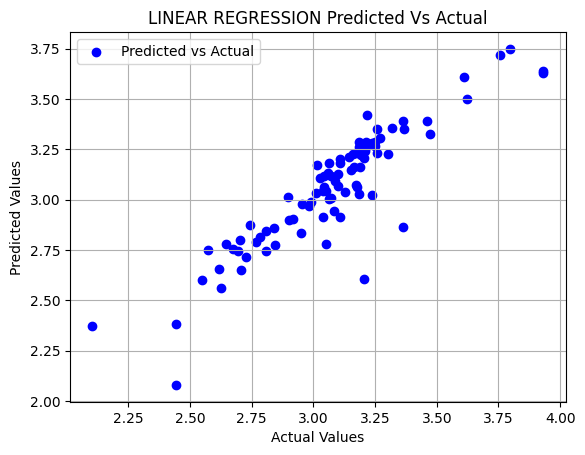

Feature: 0, Score: -0.09124
Feature: 1, Score: -0.05903
Feature: 2, Score: 0.07088
Feature: 3, Score: -0.07479
Feature: 4, Score: 0.11908
Feature: 5, Score: -0.10477
Feature: 6, Score: -0.07806
Feature: 7, Score: -0.18008


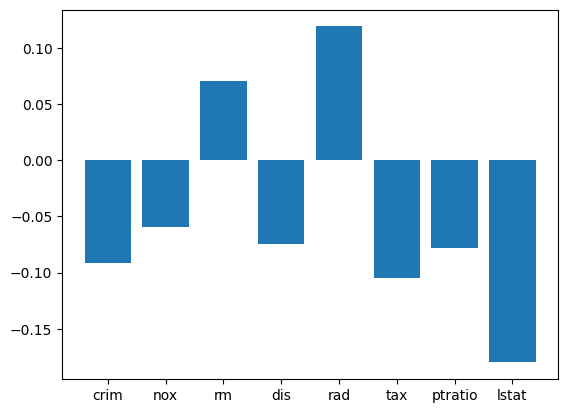

In [11]:



#splitting of dataset

X=df_cleaned.drop(['medv_log', 'medv', 'chas','zn','age','indus'],axis=1)
Y=df_cleaned['medv_log']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#standardisation

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#fitting an model
#LINEAR REGRESSION MODEL

model_LR=LinearRegression()
model_LR.fit(X_train_scaled,Y_train)
Y_predict=model_LR.predict(X_test_scaled)
mse_linearregression=mean_squared_error(Y_test,Y_predict)
r2_linearregression=r2_score(Y_test,Y_predict)
mae_linearregression=mean_absolute_error(Y_test,Y_predict)
print("MEAN SQUARED ERROR :",mse_linearregression)
print("R SQUARED VALUE:",r2_linearregression)
print("MEAN ABSOLUTE ERROR:", mae_linearregression)
plt.scatter(Y_test,Y_predict,color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LINEAR REGRESSION Predicted Vs Actual')
plt.legend()
plt.grid()
plt.show()
importance = model_LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(X.columns, importance)
plt.show()




RIDGE REGRESSION MSE: 0.018276126453223848
RIDGE REGRESSION R-SQUARED: 0.8096881566316636
RIDGE REGRESSION MEANS ABSOLUTE ERROR: 0.08829949249181768


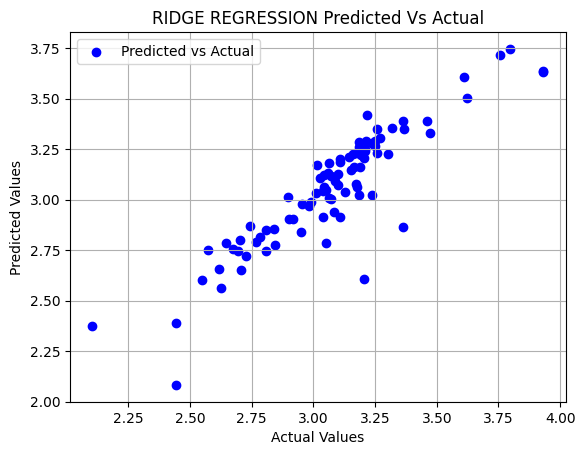

In [12]:
#RIDGE REGRESSION MODEL
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled,Y_train)
Y_predict_ridge=ridge_model.predict(X_test_scaled)
mse_ridge=mean_squared_error(Y_test,Y_predict_ridge)
r2_ridge=r2_score(Y_test,Y_predict_ridge)
mae_ridge=mean_absolute_error(Y_test,Y_predict_ridge)
print(f"RIDGE REGRESSION MSE: {mse_ridge}")
print(f"RIDGE REGRESSION R-SQUARED: {r2_ridge}")
print(f"RIDGE REGRESSION MEANS ABSOLUTE ERROR: {mae_ridge}")
plt.scatter(Y_test,Y_predict_ridge, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RIDGE REGRESSION Predicted Vs Actual')
plt.legend()
plt.grid()
plt.show()





DECISION TREE REGRESSION MSE: 0.02341717810513827
DECISION TREE REGRESSION R-SQUARED: 0.7561536716721837
DECISION TREE REGRESSION MEANS ABSOLUTE ERROR: 0.10447175298359501


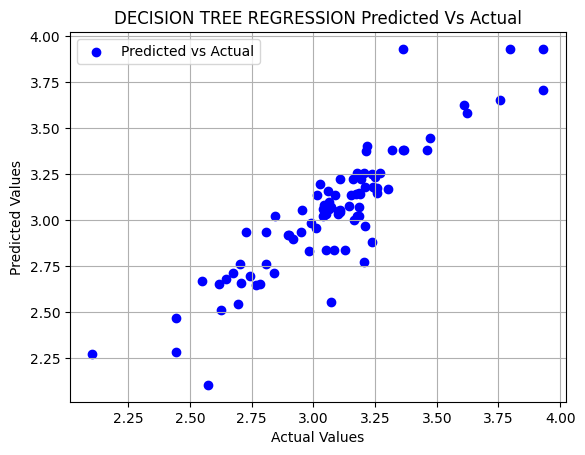

In [13]:
#DECISIONTREE REGRESSION MODEL
dtree_model=DecisionTreeRegressor(random_state=42)
dtree_model.fit(X_train_scaled,Y_train)
Y_predict_dtree=dtree_model.predict(X_test_scaled)
mse_dtree=mean_squared_error(Y_test,Y_predict_dtree)
r2_dtree=r2_score(Y_test,Y_predict_dtree)
mae_dtree=mean_absolute_error(Y_test,Y_predict_dtree)
print(f"DECISION TREE REGRESSION MSE: {mse_dtree}")
print(f"DECISION TREE REGRESSION R-SQUARED: {r2_dtree}")
print(f"DECISION TREE REGRESSION MEANS ABSOLUTE ERROR: {mae_dtree}")
plt.scatter(Y_test,Y_predict_dtree, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('DECISION TREE REGRESSION Predicted Vs Actual')
plt.legend()
plt.grid()
plt.show()




SUPPORT VECTOR REGRESSION MSE: 0.013145013042050707
SUPPORT VECTOR REGRESSION R-SQUARED: 0.8631191533098519
SUPPORT VECTOR REGRESSION MEANS ABSOLUTE ERROR: 0.08491114076815308


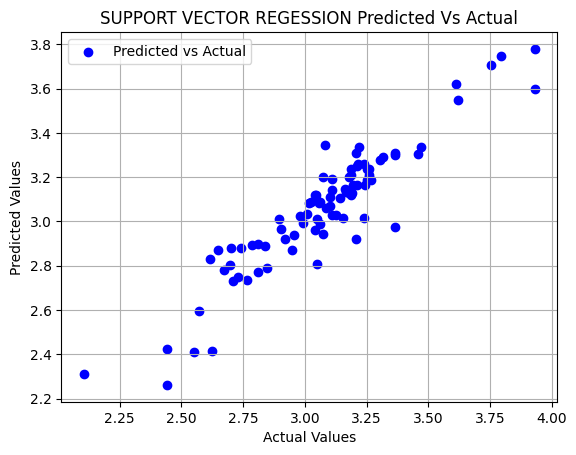

In [14]:
#SUPPORT VECTOR REGRESSION MODEL
from sklearn.svm import SVR
svr_model=SVR(kernel='rbf',C=1.0, epsilon=0.2)
svr_model.fit(X_train_scaled, Y_train)
Y_predict_svr=svr_model.predict(X_test_scaled)
mse_svr=mean_squared_error(Y_test,Y_predict_svr)
r2_svr=r2_score(Y_test,Y_predict_svr)
mae_svr=mean_absolute_error(Y_test,Y_predict_svr)
print(f"SUPPORT VECTOR REGRESSION MSE: {mse_svr}")
print(f"SUPPORT VECTOR REGRESSION R-SQUARED: {r2_svr}")
print(f"SUPPORT VECTOR REGRESSION MEANS ABSOLUTE ERROR: {mae_svr}")
plt.scatter(Y_test,Y_predict_svr, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SUPPORT VECTOR REGESSION Predicted Vs Actual')
plt.legend()
plt.grid()
plt.show()




RANDOM FOREST REGRESSION MSE: 0.010035563237387428
RANDOM FOREST REGRESSION R-SQUARED: 0.8954982860380781
RANDOM FOREST REGRESSION MEANS ABSOLUTE ERROR: 0.07422619884049947


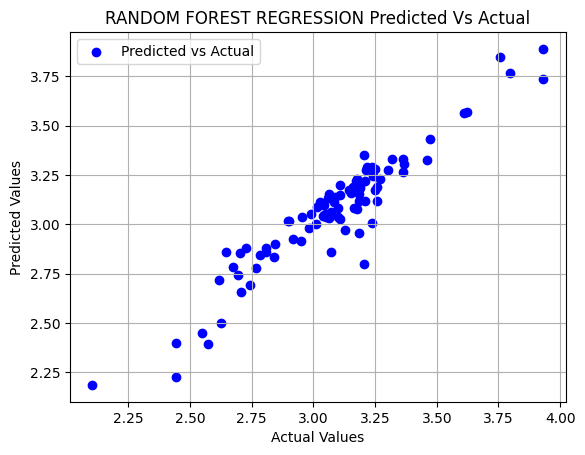

In [15]:
#RANDOM FOREST REGRESSION MODEL
rfr_model=RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train_scaled,Y_train)
Y_predict_rfr=rfr_model.predict(X_test_scaled)
mse_rfr=mean_squared_error(Y_test,Y_predict_rfr)
r2_rfr=r2_score(Y_test,Y_predict_rfr)
mae_rfr=mean_absolute_error(Y_test,Y_predict_rfr)
print(f"RANDOM FOREST REGRESSION MSE: {mse_rfr}")
print(f"RANDOM FOREST REGRESSION R-SQUARED: {r2_rfr}")
print(f"RANDOM FOREST REGRESSION MEANS ABSOLUTE ERROR: {mae_rfr}")
plt.scatter(Y_test,Y_predict_rfr, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RANDOM FOREST REGRESSION Predicted Vs Actual')
plt.legend()
plt.grid()
plt.show()



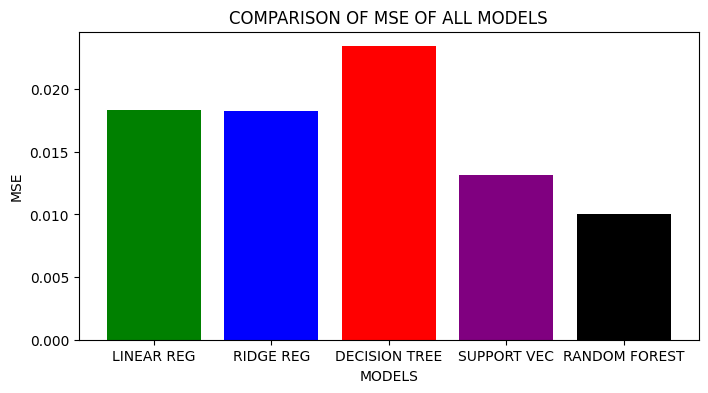

In [16]:
#MODEL COMPARISON
#MEAN SQUARED ERROR COMPARISON OF  ALL MODELS
mse_values={'LINEAR REG':mse_linearregression,'RIDGE REG':mse_ridge,
            'DECISION TREE':mse_dtree,'SUPPORT VEC':
            mse_svr,'RANDOM FOREST':mse_rfr}
model_names_mse=list(mse_values.keys())
model_values_mse=list(mse_values.values())
plt.figure(figsize=(8,4))
plt.bar(model_names_mse,model_values_mse,color=['green','blue','red','purple','black'])
plt.xlabel('MODELS')
plt.ylabel('MSE')
plt.title('COMPARISON OF MSE OF ALL MODELS')
plt.show()




In [ ]:
#COMPARISON SHOWS THAT LINEAR REGRESSION MODEL AND RIDGE REGRESSION MODELS HAVE PREDICTED CLOSE
 
